In [1755]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1756]:
afit = pd.read_csv('../data/afit.csv',index_col=0)

<Axes: xlabel='Run', ylabel='x1'>

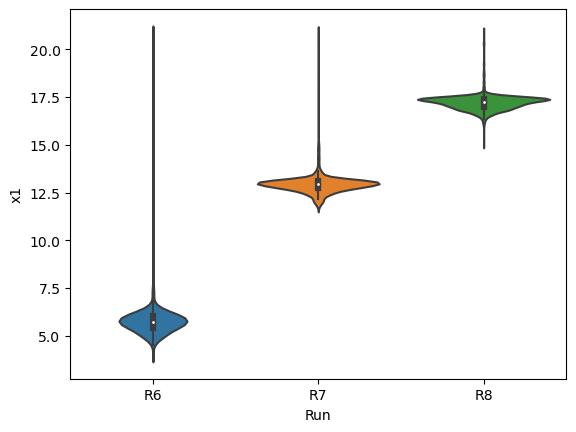

In [1757]:
sns.violinplot(data=afit,x='Run',y='x1')

In [1758]:
from sklearn.mixture import GaussianMixture

In [1759]:
x = afit[['p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14']]

y = afit['x1']

In [1760]:
model = GaussianMixture(n_components=3,max_iter=2000)

In [1761]:
model.fit(y.values.reshape(-1,1))

GaussianMixture(max_iter=2000, n_components=3)

In [1762]:
for mean, cov in sorted(zip(model.means_, np.sqrt(model.covariances_))):
    print("Mean: {:4.1f} STD: {:4.1f}".format(mean[0], (cov)[0][0]))

Mean:  5.7 STD:  0.5
Mean: 12.9 STD:  0.5
Mean: 17.2 STD:  0.4


# MLP (Multi-Layer Perceptron Network)

In [1763]:
#Divide the dataframe into each runs

R6 = afit[afit['Run']=='R6']
R7 = afit[afit['Run']=='R7']
R8 = afit[afit['Run']=='R8']

run_list = [R6,R7,R8]

In [1764]:
# Else, use this plain data

train = R6.drop(['H','W','L','time','Run'],axis=1)
test = pd.concat([R7,R8])
test = test.drop(['H','W','L','time','Run'],axis=1)

In [1765]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [1766]:
X_train = train.drop('x1',axis=1)
y_train = train['x1']
X_test = test.drop('x1',axis=1)
y_test = test['x1']

In [1767]:
mlp = MLPRegressor(hidden_layer_sizes=(50,40,40,30))
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 40, 40, 30))

In [1768]:
mlp.score(X_test,y_test)

0.957323688279987

In [1769]:
test_full = afit[(afit['Run']=='R7') | (afit['Run']=='R8')]

In [1770]:
test_full['pred'] = mlp.predict(X_test)

/var/folders/p7/nw95jv590mv77sxbkj0f4wqc0000gn/T/ipykernel_13125/4093689068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_full['pred'] = mlp.predict(X_test)


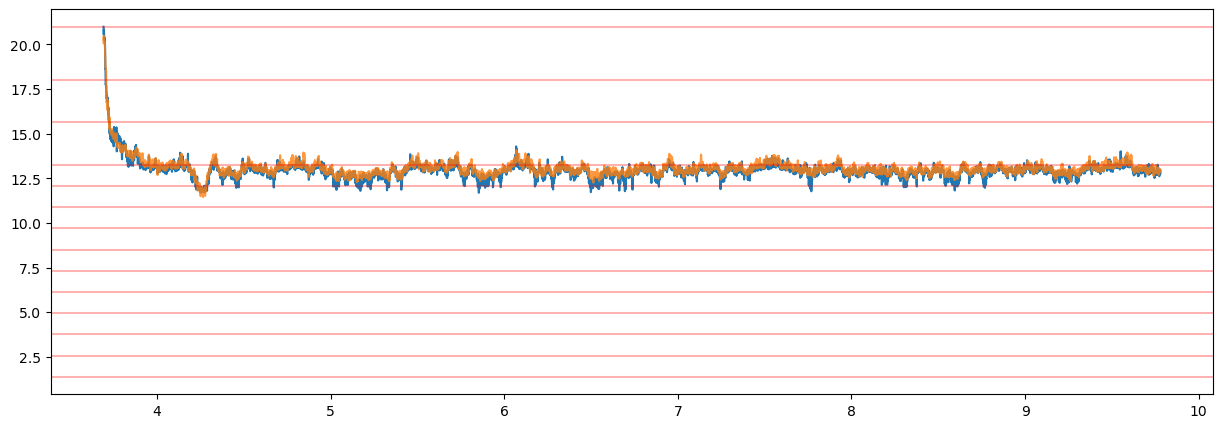

In [1771]:
plt.figure(figsize=(15,5))

plt.plot(test_full[test_full['Run']=='R7']['time'],test_full[test_full['Run']=='R7']['x1'], label='True STLE')
plt.plot(test_full[test_full['Run']=='R7']['time'],test_full[test_full['Run']=='R7']['pred'],label='Predicted STLE',alpha=0.8)

for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14']:
    plt.axhline(test_full[j].iloc[0],color='red',alpha=.3)
    
plt.show()

# MDN

In [1772]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [1773]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1774]:
# Else, use this plain data
train = pd.concat([R7,R8])
train = train.drop(['H','W','L','time','Run',
                'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
       'px11', 'px12', 'px13', 'px14'],axis=1)

test = R6.copy()
test = test.drop(['H','W','L','time','Run',
                 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
       'px11', 'px12', 'px13', 'px14'],axis=1)



In [1775]:
X = afit[['p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14']]
y = afit['x1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1776]:
X_train = train.drop('x1',axis=1)
y_train = train['x1']
X_test = test.drop('x1',axis=1)
y_test = test['x1']

In [1777]:
N_MIXES = 2
OUTPUT_DIMS = 1

model = Sequential()
model.add(Dense(30, batch_input_shape=(None,14),activation='linear'))
model.add(Dense(30, activation='linear'))
model.add(mdn.MDN(OUTPUT_DIMS,N_MIXES))
model.compile(loss = mdn.get_mixture_loss_func(OUTPUT_DIMS,N_MIXES), optimizer='rmsprop')

In [1778]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min', verbose=1)

model.fit(X_train,y_train.values,epochs=3,batch_size=256,validation_data=(X_test,y_test.values))

Epoch 1/3
48/48 [==============================] - 1s 4ms/step - loss: 3.1552 - val_loss: 21.4150
Epoch 2/3
48/48 [==============================] - 0s 984us/step - loss: 2.1337 - val_loss: 16.1041
Epoch 3/3
48/48 [==============================] - 0s 956us/step - loss: 2.1171 - val_loss: 9.2300


In [1779]:
y_test_param = model.predict(X_test)

219/219 [==============================] - 0s 253us/step


In [1780]:
y_samples = np.apply_along_axis(mdn.sample_from_output, OUTPUT_DIMS, y_test_param, OUTPUT_DIMS, N_MIXES, temp=1.0)

In [1781]:
test_full = afit[(afit['Run']=='R6')]

In [1782]:
test_full['pred'] = y_samples.flatten()

/var/folders/p7/nw95jv590mv77sxbkj0f4wqc0000gn/T/ipykernel_13125/3715434401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_full['pred'] = y_samples.flatten()


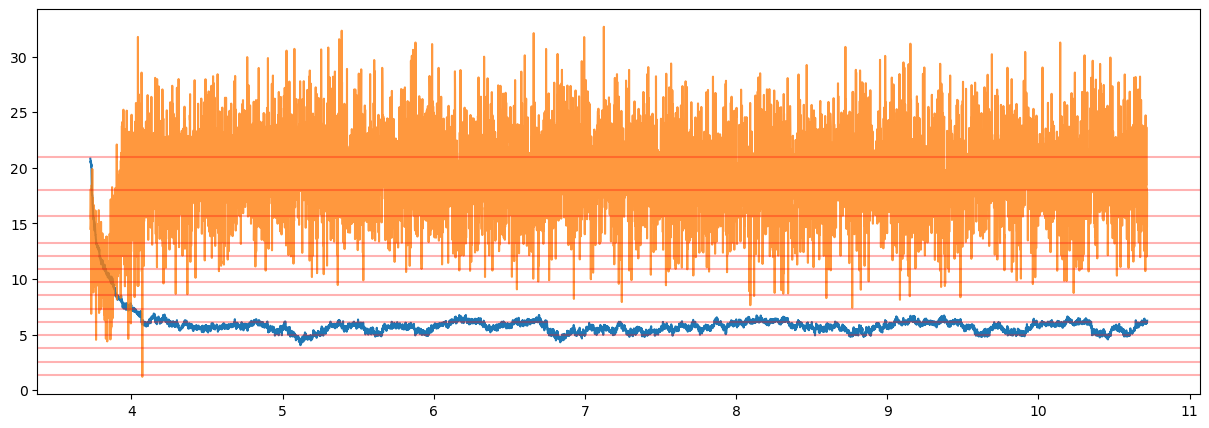

In [1783]:
plt.figure(figsize=(15,5))

plt.plot(test_full[test_full['Run']=='R6']['time'],test_full[test_full['Run']=='R6']['x1'], label='True STLE')
plt.plot(test_full[test_full['Run']=='R6']['time'],test_full[test_full['Run']=='R6']['pred'],label='Predicted STLE',alpha=0.8)

for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14']:
    plt.axhline(test_full[j].iloc[0],color='red',alpha=.3)
    
plt.show()

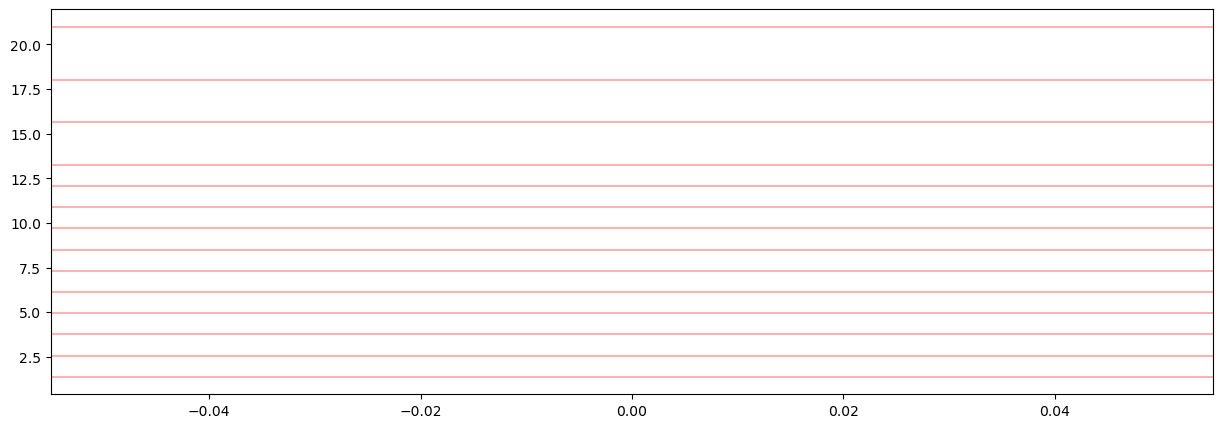

In [1784]:
plt.figure(figsize=(15,5))

plt.plot(test_full[test_full['Run']=='R7']['time'],test_full[test_full['Run']=='R7']['x1'], label='True STLE')
plt.plot(test_full[test_full['Run']=='R7']['time'],test_full[test_full['Run']=='R7']['pred'],label='Predicted STLE',alpha=0.8)

for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14']:
    plt.axhline(test_full[j].iloc[0],color='red',alpha=.3)
    
plt.show()